<a href="https://colab.research.google.com/github/vijaydevverse/data-science-eda-ml-projects/blob/main/HeartAttackEdaV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Heart Attack Data Set.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
duplicate_count = df.duplicated().sum()

In [ ]:
duplicates = df[df.duplicated()]

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

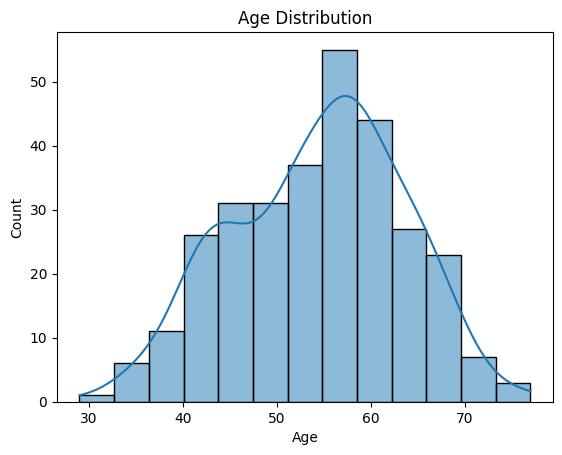

In [ ]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

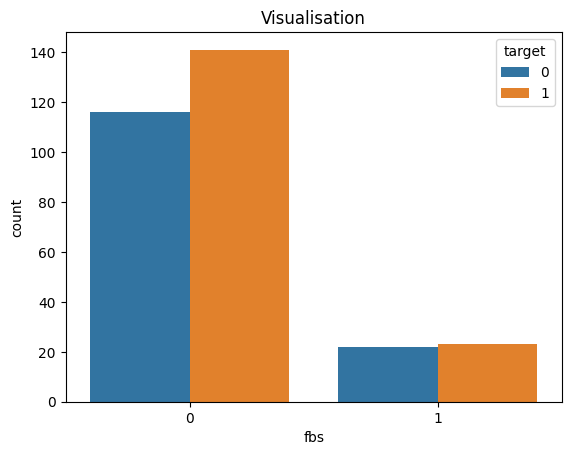

In [ ]:
sns.countplot(data=df, x='fbs', hue='target')
plt.title("Visualisation")
plt.show()

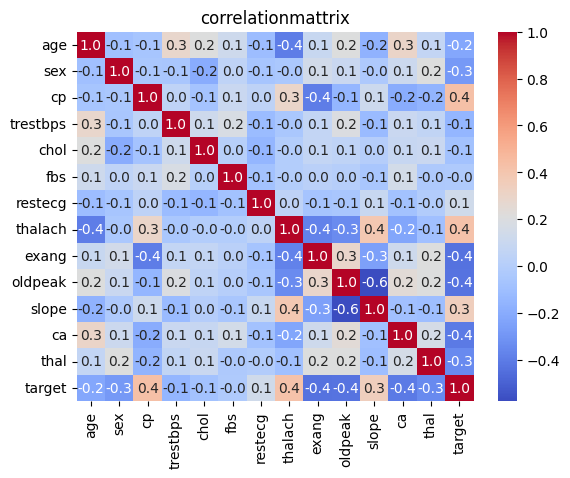

In [ ]:
cm=df.corr()
sns.heatmap(cm,annot=True,fmt="0.1f",cmap="coolwarm")
plt.title("correlationmattrix")
plt.show()

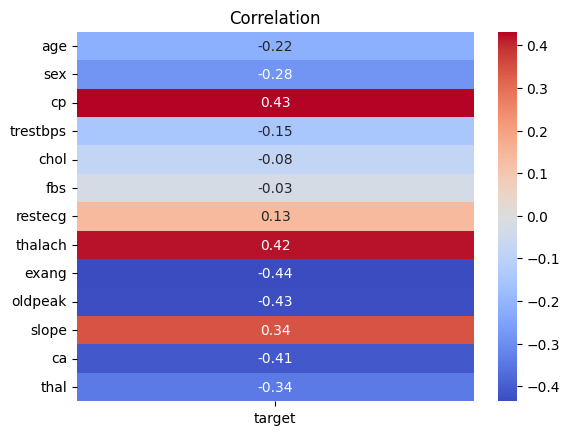

In [ ]:
survived_corr = df.corr()["target"]
survived_corr = survived_corr.drop('target')
sns.heatmap(survived_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})
plt.title('Correlation')
plt.show()

<Axes: >

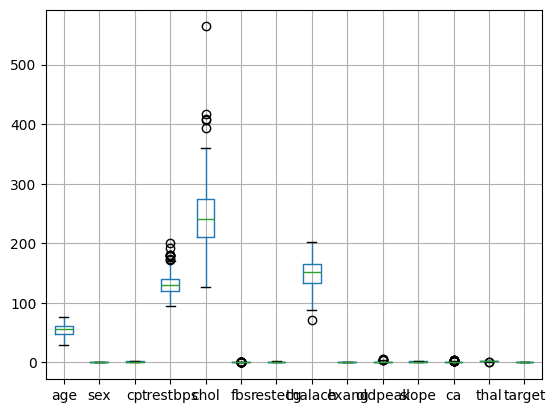

In [ ]:
df.boxplot()

In [ ]:
def remove_outliers_iqr(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
  return df

df_cleaned=remove_outliers_iqr(df,exclude_column='target')
df=df_cleaned

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       228 non-null    int64  
 1   sex       228 non-null    int64  
 2   cp        228 non-null    int64  
 3   trestbps  228 non-null    int64  
 4   chol      228 non-null    int64  
 5   fbs       228 non-null    int64  
 6   restecg   228 non-null    int64  
 7   thalach   228 non-null    int64  
 8   exang     228 non-null    int64  
 9   oldpeak   228 non-null    float64
 10  slope     228 non-null    int64  
 11  ca        228 non-null    int64  
 12  thal      228 non-null    int64  
 13  target    228 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.7 KB


In [ ]:
df.shape

(228, 14)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
features = ["age","sex","cp","trestbps","chol","fbs","restecg",
            "thalach","exang","oldpeak","slope","ca","thal"]

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df[features])

scaled_df=pd.DataFrame(scaled_data,columns=features)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
scaled_df["target"]=df["target"]

In [ ]:
scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.170213,1.0,0.666667,0.473684,0.519651,0.0,0.5,0.868421,0.0,0.875,0.0,0.0,0.5,NaN
1,0.255319,0.0,0.333333,0.473684,0.318777,0.0,0.0,0.736842,0.0,0.350,1.0,0.0,0.5,1.0
2,0.574468,1.0,0.333333,0.342105,0.458515,0.0,0.5,0.789474,0.0,0.200,1.0,0.0,0.5,1.0
3,0.595745,0.0,0.000000,0.342105,0.973799,0.0,0.5,0.657895,1.0,0.150,1.0,0.0,0.5,1.0
4,0.595745,1.0,0.000000,0.605263,0.266376,0.0,0.5,0.526316,0.0,0.100,0.5,0.0,0.0,1.0


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
scaled_df=scaled_df.dropna(subset=["target"])

In [ ]:
scaled_df=scaled_df.reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X=df.drop("target", axis=1)
y=df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.79
